In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# u(x) = 1/2 x^2
def ddu(x, dx):
    return dx * dx

def du(x, dx):
    return x * dx

def u(x):
    return 0.5 * x**2

def err(obs, true):
    if true == 0:
        return float('nan')
    
    per = 1000
    return (abs(obs - true)/true * per)//1 / (per / 100)

In [3]:
# simulation constants
start=0
stop=1
n=100
dx = (stop-start)/n

# initial values
u0 = 0
du_0 = 0 # only used in 2nd order method

In [4]:
# 1st order euler's method
u_n = u0
for i, x in enumerate(np.linspace(start, stop, n)):
    u_n = u_n + du(x, dx)
    if (i < 10 or i % 100 == 0):
        print(i, u_n, u(x), f'{err(u_n, u(x))}%')

0 0.0 0.0 nan%
1 0.00010101010101010102 5.101520253035405e-05 98.0%
2 0.0003030303030303031 0.0002040608101214162 48.5%
3 0.0006060606060606061 0.00045913682277318646 31.9%
4 0.00101010101010101 0.0008162432404856648 23.7%
5 0.0015151515151515154 0.0012753800632588515 18.7%
6 0.0021212121212121214 0.0018365472910927458 15.5%
7 0.0028282828282828287 0.0024997449239873492 13.1%
8 0.003636363636363637 0.0032649729619426593 11.3%
9 0.004545454545454546 0.004132231404958678 10.0%


In [5]:
# 2nd order euler's method
u_n = u0
du_n = du_0
for i, x in enumerate(np.linspace(start, stop, n)):
    u_n = u_n + du_n
    du_n = du_n + ddu(x, dx)
    if (i < 10 or i % 100 == 0):
        print(i, u_n, u(x), f'{err(u_n, u(x))}%')

0 0 0.0 nan%
1 0.0001 5.101520253035405e-05 96.0%
2 0.00030000000000000003 0.0002040608101214162 47.0%
3 0.0006000000000000001 0.00045913682277318646 30.6%
4 0.001 0.0008162432404856648 22.5%
5 0.0015 0.0012753800632588515 17.6%
6 0.0021000000000000003 0.0018365472910927458 14.3%
7 0.0028000000000000004 0.0024997449239873492 12.0%
8 0.0036000000000000008 0.0032649729619426593 10.2%
9 0.0045000000000000005 0.004132231404958678 8.9%


# let's graph this

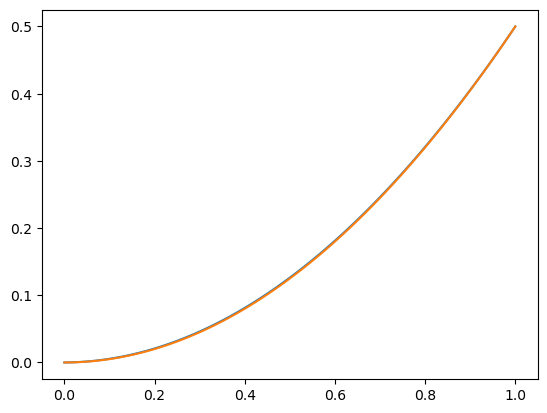

In [6]:
# 1st order euler's method
approx = np.zeros(n)
approx[0] = u0
for i, x in enumerate(np.linspace(start, stop, n)[1:], start=1):
    approx[i] = approx[i-1] + du(x, dx)

x = np.linspace(start, stop, n)
exact = u(x)

plt.plot(x, approx)
plt.plot(x, exact)
plt.show()

# Now switching to $f$

$$f(x, y) = e^{-r(x,y)} \cdot sin(2 \pi\cdot r(x,y))$$

$$r(x, y) = \sqrt{x^2 + y^2}$$

In [7]:
from matplotlib.animation import FuncAnimation
from IPython import display
# plt.ioff() # turn off auto display
None

In [8]:
def f(x, y):
    def r(x, y):
        return np.sqrt(x**2 + y**2)
    return np.exp(-r(x,y)) * np.sin(2 * np.pi * r(x,y))

def pdf_dx(x, y):
    r = np.sqrt(x**2 + y**2)
    return (x/r) * np.exp(-r) * (2 * np.pi * np.cos(2*np.pi*r) - np.sin(2*np.pi*r))
def pdf_dy(x, y):
    """this only differs from the partial df/dx by the first (x/r) being a (y/r)"""
    r = np.sqrt(x**2 + y**2)
    return (y/r) * np.exp(-r) * (2 * np.pi * np.cos(2*np.pi*r) - np.sin(2*np.pi*r))

def df(x, dx, y, dy):
    return pdf_dx(x, y) * dx + pdf_dy(x,y) * dy

In [9]:
# simulation constants
start=-1
stop=1
n=400+1
dx = (stop-start)/n
dy = (stop-start)/n

space = lambda: np.linspace(start, stop, n)
zero_ind = n//2 # the index of 0
assert(space()[zero_ind] == 0.0)

# initial values
f0 = 0

In [10]:
# 1st order euler's method
approx = np.zeros((n, n))
approx[0,0] = f0

# go down 1st axis:
# [-1              0      -->          1]
#                   ^^^^^^^^^^^^^^^^^^^^n
#                  ^ zero_ind
y = 0
for i, x in enumerate(space()[zero_ind+1:], start=zero_ind+1):
    approx[i,zero_ind] = approx[i-1, zero_ind] + df(x, dx, y, 0)

# [-1       <--    0                   1]
# 0^^^^^^^^^^^^^^^^
#                  ^ zero_ind
for i, x in reversed(list(enumerate(space()[:zero_ind], start=0))):
    approx[i,zero_ind] = approx[i+1, zero_ind] + df(x, -dx, y, 0)

# go down 2nd axis
x = space()
for j, y in enumerate(space()[zero_ind+1:], start=zero_ind+1):
    approx[:,j] = approx[:,j-1] + df(x, 0, y, dy)
for j, y in reversed(list(enumerate(space()[:zero_ind], start=0))):
    approx[:,j] = approx[:,j+1] + df(x, 0, y, -dy)

In [11]:
x = np.linspace(start, stop, n)
y = np.linspace(start, stop, n)
x, y = np.meshgrid(x, y)

exact = f(x, y)

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# surf = ax.plot_surface(x, y, exact, cmap=cm.coolwarm)
surf = ax.plot_surface(x, y, approx-exact, cmap=cm.coolwarm)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

def animate(frame):
    ax.view_init(30, frame/4)
    return fig

anim = FuncAnimation(fig, animate, frames=100, interval=20)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

# Wave equation

$$D_{tt} = c^2 (D_{xx}u + D_{yy}u)$$

In [19]:
# simulation constants
n=300
start=-1
stop=1
dx = (stop-start)/n
dy = (stop-start)/n
dt = dx
c = 0.7
assert(dy == dx)
alpha = ((dt*c)/dx)**2
THREE_D = True

x = np.linspace(start, stop, n)
y = np.linspace(start, stop, n)
x, y = np.meshgrid(x, y)

# 3 slices of time
w = np.zeros((3, n, n))

def drop(x,y):
    r = 2
    w[0, x-r:x+r, y-r:y+r] = 120/255
    
drop(n//2,n//4)

drop(n//4, n//2)

if THREE_D:
    ax = (fig:=plt.figure()).add_subplot(projection="3d")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
else:
    ax = (fig:=plt.figure()).add_subplot()

old_artists = []
args = {'cmap':cm.coolwarm, 'vmin':-0.2, 'vmax':0.2}
def animate(frame):
    global old_artists
    print(f'\r{frame/num_frames*100//1}%', end='')
    
    # wave equation update
    w[2,] = w[1]
    w[1] = w[0]
    w[0,1:-1,1:-1] = (2 * w[1,1:-1,1:-1] - w[2,1:-1,1:-1] + 
        alpha * (w[1,0:-2,1:-1] + 
                 w[1,1:-1,0:-2] - 
               4*w[1,1:-1,1:-1] + 
                 w[1,2:,1:-1] + 
                 w[1,1:-1,2:]))

    
    # animation update
    if len(old_artists) >= 1:
        for a in old_artists:
            a.remove()

    z = np.clip(w[0,:,:], -1, 1)
    if THREE_D:
        surf = ax.plot_surface(x, y, z, **args)
    else:
        surf = ax.imshow(z, **args)
    cb = fig.colorbar(surf, shrink=0.5, aspect=5)
    old_artists = [cb, surf]
    return fig

num_frames = 1000
anim = FuncAnimation(fig, animate, frames=num_frames, interval=16)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

99.0%